# Generación de imágenes a partir de texto

- Alumnos:
  - Tenorio Isaias
  - Leandro Saraco

Diciembre 2024 - LLMIAG - FIUBA

In [ ]:
!pip install transformers
!pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-wukfxzi0
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-wukfxzi0
  Resolved https://github.com/huggingface/diffusers.git to commit 6131a93b969f87d171148bd367fd9990d5a49b6b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=3000098 sha256=4ac022bb99a6d2d7d0d4325c8baf7718017575c61f6555eeeeb34986c541869e
  Stored in directory: /tmp/pip-ephem-wheel-cache-yahv6op3/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


In [ ]:
import os
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### Función auxiliar: mostrar varias imágenes en una misma fila
Esta función se utilizará para ver distintos resultados de imágenes generadas a partir de un mismo prompt

In [ ]:
def plot_images(images):
  """
  Muestra varias imágenes en una misma fila.
  Parámetros:
  images (lista de imagenes)

  """
  plt.figure()
  f, axarr = plt.subplots(1, len(images), figsize=(20,10))
  for ax, img in zip(axarr.flatten(), images):
      ax.imshow(img)
      ax.axis('off')
  plt.show()

## Carga del modelo Stable Difussion Base v2

In [ ]:
# Carga de modelo elegido usando StableDiffusionPipeline de diffusers, con pesos pre-entrenados
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-base", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

## Prueba del modelo

- Se utiliza el prompt "A bicycle with a front basket and a cat inside it".
- Se generan 4 imágenes por prompt.

In [ ]:
prompt = "A bicycle with a front basket and a cat inside it"
images = pipe(prompt, num_images_per_prompt=4).images

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

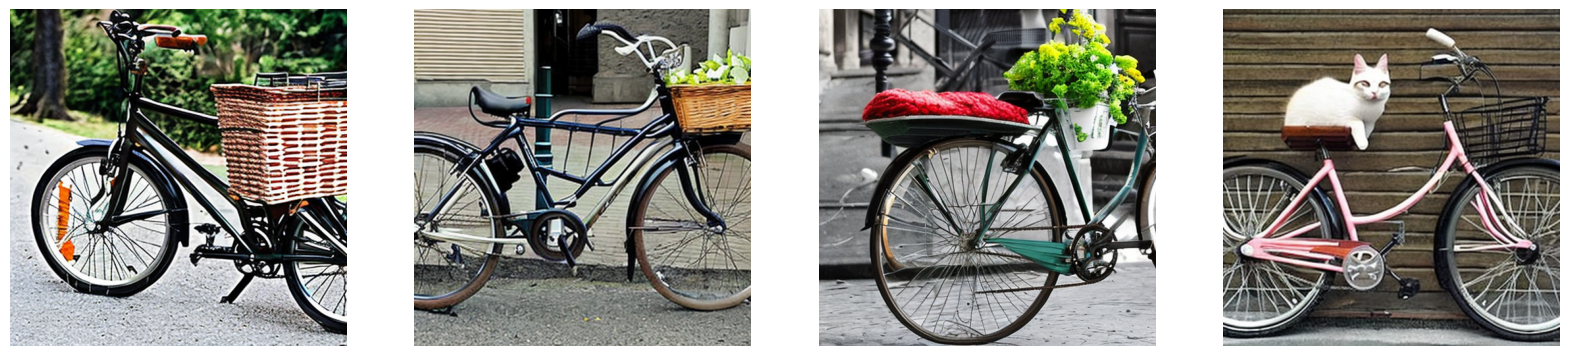

In [ ]:
plot_images(images)

## Utilizando la versión refinada de Stable Difussion v2

- Stable diffussion v2 es exactamente el mismo modelo que su versión base, pero con más epocas de entrenamiento

Limpieza de memoria

In [ ]:
import gc

del pipe
del images
gc.collect()
torch.cuda.empty_cache()

Carga del modelo

In [ ]:
# Carga de modelo elegido usando StableDiffusionPipeline de diffusers, con pesos pre-entrenados
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Generacion de imagenes con el mismo prompt usando anteriormente

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

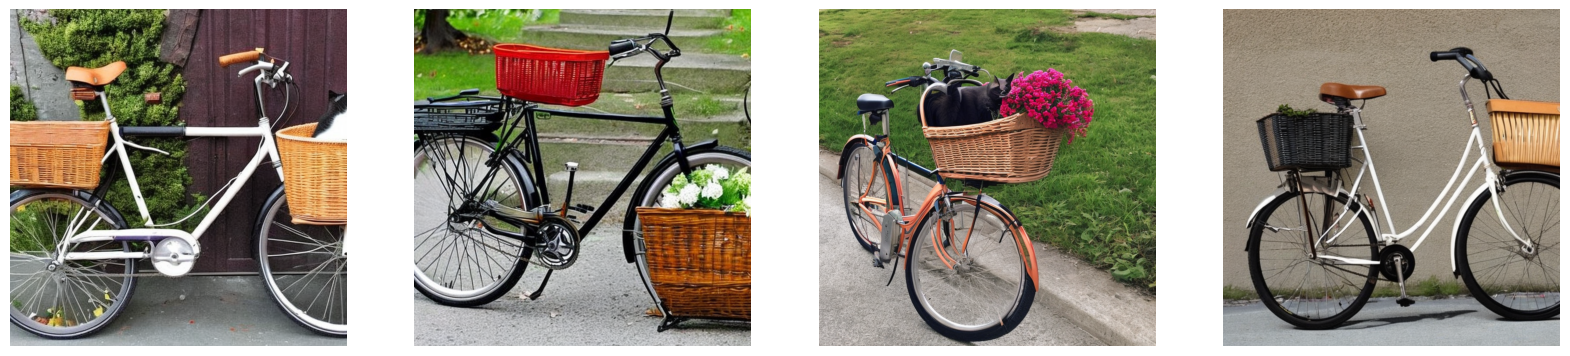

In [ ]:
prompt = "A bicycle with a front basket and a cat inside it"
images = pipe(prompt, num_images_per_prompt=4).images
plot_images(images)